### Settings

In [186]:
USE_MINUTES = True

USE_ROLLING_WINDOW = True
ROLLING_WINDOW_SIZE = 10
USE_MEAN = True # Otherwise Median will be used

### Imports

In [187]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

from oak_cli.utils.logging import logger
from oak_cli.evaluation.machine.main import EVALUATION_CSV

### Error Handing & Checking

In [188]:
if not EVALUATION_CSV.exists():
    logger.error(f"{EVALUATION_CSV} does not exist yet!")
    sys.exit(1)

### Graph Styling

In [189]:
# Graph Styling #
sns.set_style("whitegrid")

# Graph Drawing

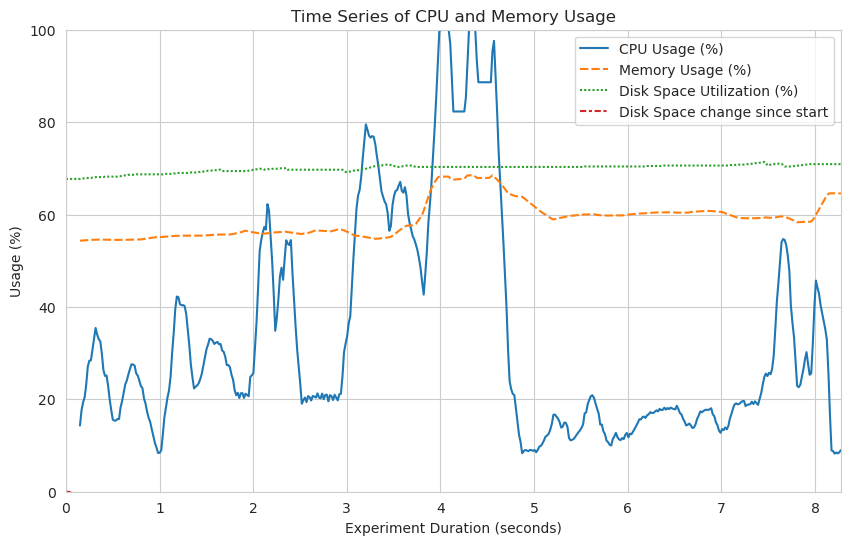

In [190]:
# Load the CSV file into a DataFrame
df = pd.read_csv(EVALUATION_CSV)

if USE_ROLLING_WINDOW:
    tmp = df[['CPU Usage (%)', 'Memory Usage (%)']].rolling(window=ROLLING_WINDOW_SIZE)
    df[['CPU Usage (%)', 'Memory Usage (%)']] = tmp.mean() if USE_MEAN else tmp.median()

df.set_index("Time since experiment start", inplace=True)

if USE_MINUTES:
    df.index = df.index / 60

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(data=df[["CPU Usage (%)", "Memory Usage (%)", "Disk Space Utilization (%)", "Disk Space change since start"]])
plt.title("Time Series of CPU and Memory Usage")
plt.xlabel("Experiment Duration (seconds)")
plt.ylabel("Usage (%)")

# Constrain axes e.g. start at 0
plt.xlim([0, max(df.index)])
plt.ylim(0, 100)

plt.show()